#**Perceptron**  
We will use Iris dataset 

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()

array([0])

Use only Petal length and Petal width

In [ ]:
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(int) # Iris setosa?


Use a Perceptron to predict a flower with Petal measurements [2, 0.5]

In [ ]:
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])
y_pred


array([0])

#**MLP with Keras**  
We will model a neural network with Keras to classify Fashion MNIST dataset.  
Fashion MNIST is composed of 70,000 grayscale images of 28 x 28 pixels each, with 10 classes.  
A simple linear model reaches about 83% on Fashion MNIST, that's why we will try to classify the images using an ANN with Keras & TensorFlow

In [2]:
import tensorflow as tfx
from tensorflow import keras

# Loading Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full.shape # (60000, 28, 28)
X_train_full.dtype # dtype(‘uint’)


4431872/4422102 [==============================] - 0s 0us/step


dtype('uint8')

Creating a validation set of 10,000 images out of the training set.  
So far we have 10,000 images as test set, 10,000 as validation set, and 50,000 for training.  
We're scaling the pixel intensities down to 0..1 by dividing them by 255.0

In [3]:
# Creating a validation set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


Testing the class name

In [4]:
class_names[y_train[0]]

'Coat'

In [5]:
# Creating the model using the Sequential API
model = keras.models.Sequential() # Creates a sequential model
model.add(keras.layers.Flatten(input_shape=[28, 28])) # Converts input images to a 1D array
model.add(keras.layers.Dense(300, activation="relu")) # Hidden layer with 300 neurons with ReLU
model.add(keras.layers.Dense(100, activation="relu")) # Hidden layer with 100 neurons with ReLU
model.add(keras.layers.Dense(10, activation="softmax")) # Output layer. 1 output neuron per class


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Model layers can be displayed as a list

In [7]:
model.layers

Model layers can be fetched by index or by name

In [9]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [12]:
model.get_layer('dense') is hidden1

True

In [16]:
weights, biases = hidden1.get_weights()
weights

array([[-0.02740303,  0.07012263, -0.02336841, ..., -0.02516852,
         0.01172905,  0.00136475],
       [-0.04746045,  0.00635312, -0.03730462, ..., -0.03100891,
         0.04462709,  0.00647614],
       [ 0.04566488, -0.05428149,  0.04389514, ..., -0.06441057,
         0.05697359, -0.06475675],
       ...,
       [ 0.07087371,  0.07362942,  0.03925432, ..., -0.01094624,
         0.07105367, -0.02575918],
       [-0.02577762,  0.0090904 ,  0.02932031, ...,  0.00399914,
        -0.01275756,  0.01217452],
       [-0.04067228,  0.06905347, -0.04787147, ...,  0.03758493,
         0.03406353,  0.01796364]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
biases.shape

(300,)

Compiling the model

In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Training the model

In [21]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7205 - accuracy: 0.7631 - val_loss: 0.5222 - val_accuracy: 0.8210
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4887 - accuracy: 0.8307 - val_loss: 0.4831 - val_accuracy: 0.8414
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4453 - accuracy: 0.8437 - val_loss: 0.4427 - val_accuracy: 0.8452
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4189 - accuracy: 0.8534 - val_loss: 0.4094 - val_accuracy: 0.8580
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3976 - accuracy: 0.8604 - val_loss: 0.3863 - val_accuracy: 0.8652
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3820 - accuracy: 0.8656 - val_loss: 0.3743 - val_accuracy: 0.8686
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3680 - accuracy: 0.8693 - val_loss: 0.3919 - val_accuracy:

Visualizing the learning curves

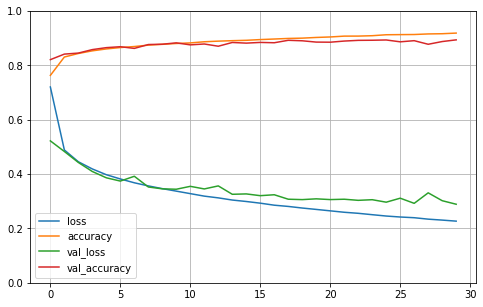

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Evaluating the model

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3244 - accuracy: 0.8839


[0.3243924677371979, 0.883899986743927]

Using the model to make predictions

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Predicted images are [9, 2, 1]

In [28]:
import numpy as np

y_pred=[9, 2, 1]
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Checking with the labels

In [29]:
np.array(class_names)[y_test[0:3]]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')